# Módulo 6 Actvidad 3

## Intención del aprendizaje esperado:

**3. Elaborar un modelo predictivo aplicando técnicas de Agrupamiento Jerárquico utilizando lenguaje Python para resolver un problema de clusterización**

## Ejercicios Planteados


**Para esta sección, siga los pasos para crear la clasificación:**


**1. Para un grupo de datos simulados, use la siguiente función:**


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent
from scipy.spatial.distance import cdist
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings("ignore")


In [112]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)


**2. Para la siguiente clasificación construya un dendrograma, con distintas métricas.**

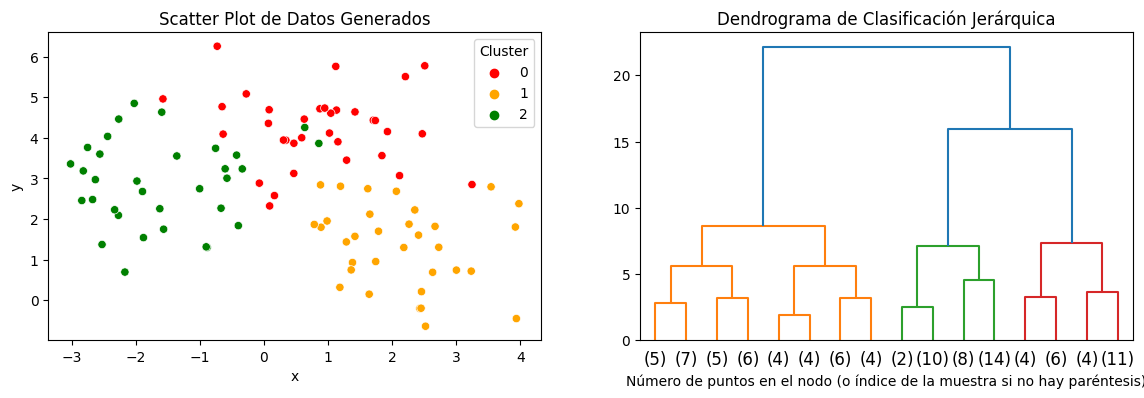

In [113]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)


df = pd.DataFrame(X, columns=['x', 'y'])
df['Cluster'] = y

colores_scatter = ['Red', 'Orange', 'Green']

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(ax=axes[0], data=df, x='x', y='y', hue='Cluster', palette=colores_scatter)
axes[0].set_title('Scatter Plot de Datos Generados')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

plt.title('Dendrograma de Clasificación Jerárquica')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice de la muestra si no hay paréntesis)")


plt.show()



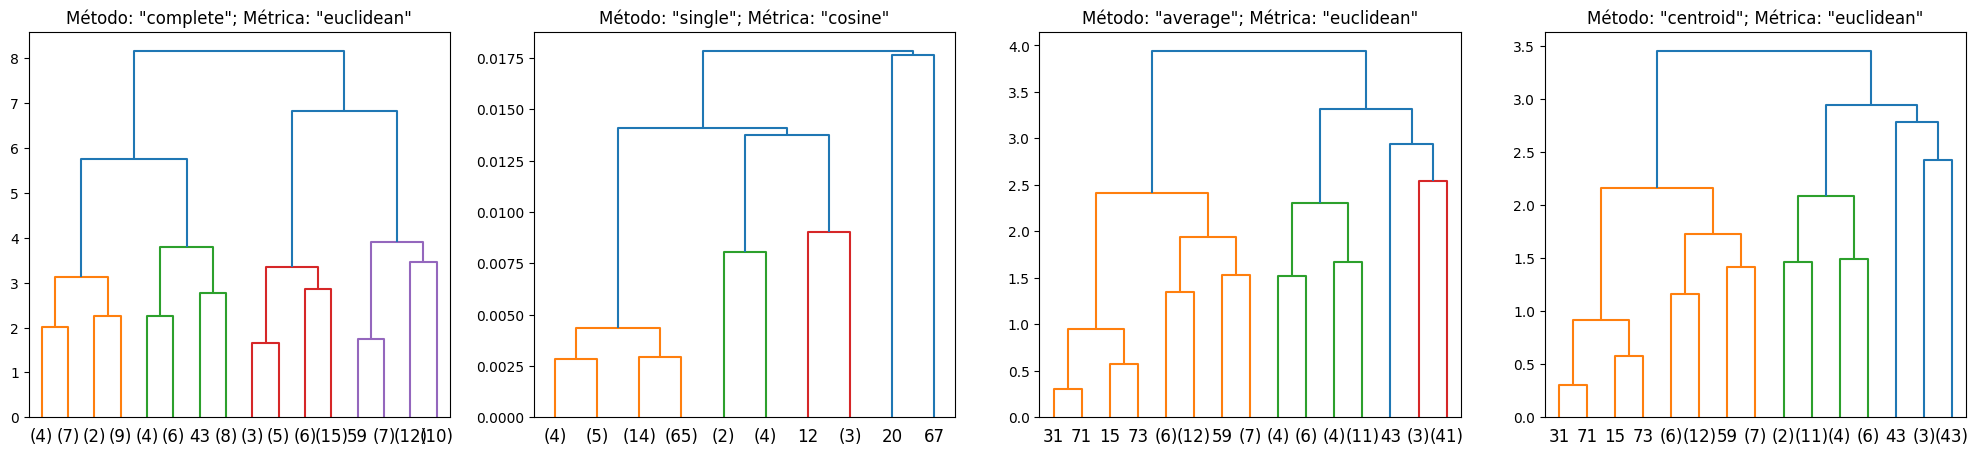

In [114]:
Z = linkage(X, method='complete', metric='euclidean')

Z_1 = linkage(X, method='single', metric='cosine')

Z_2 = linkage(X, method='average', metric='euclidean')

Z_3 = linkage(X, method='centroid', metric='euclidean')

plt.figure(figsize=(25, 5))

# Primer dendrograma
plt.subplot(1, 4, 1)
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Método: "complete"; Métrica: "euclidean"')

# Segundo dendrograma
plt.subplot(1, 4, 2)
dendrogram(Z_1, truncate_mode='level', p=3)
plt.title('Método: "single"; Métrica: "cosine"')

# Tercer dendrograma
plt.subplot(1, 4, 3)
dendrogram(Z_2, truncate_mode='level', p=3)
plt.title('Método: "average"; Métrica: "euclidean"')

# Cuarto dendrograma
plt.subplot(1, 4, 4)
dendrogram(Z_3, truncate_mode='level', p=3)
plt.title('Método: "centroid"; Métrica: "euclidean"')

plt.show()

**3. Establezca el k adecuado para estos datos.**

**4. Tome la decisión por medio de “índices silhouette”**


El agrupamiento jerárquico es un método que permite realizar un dendograma o diagrama de relación entre los distintos elementos de un conjunto de datos.  Por otra parte en consideración de la naturaleza aleatoria de los datos, el número de clúster puede responder más bien a una razón estética y de comprensión del gráfico más que la utilidad para el análisis.

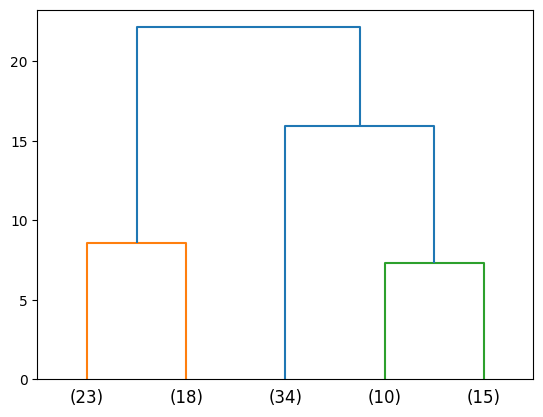

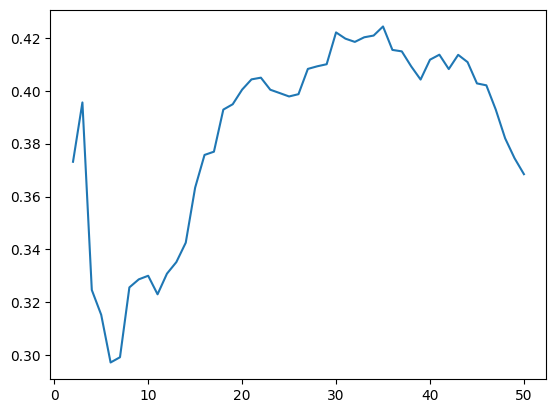

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


Z = linkage(X, method='ward')

cantidad_cluster = []
silhouette_valores = []

for i in range(2, 51):
    cluster_labels = AgglomerativeClustering(n_clusters=i).fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)

    cantidad_cluster.append(i)
    silhouette_valores.append(silhouette_avg)


num_clusters = 5

dendrogram(Z, truncate_mode='lastp', p=num_clusters)
plt.show()


plt.plot(cantidad_cluster, silhouette_valores)
plt.show()

maximo = max(silhouette_valores)
indice_max = silhouette_valores.index(maximo)

Dendograma con cantidad de clúster según el mejor valor de índice de Silhouette

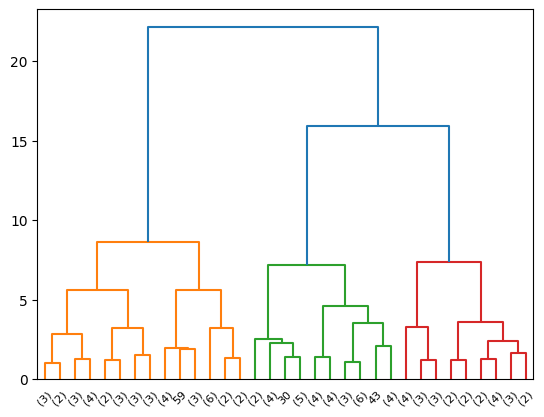

In [116]:
dendrogram(Z, truncate_mode='lastp', p=indice_max)
plt.show()